# Data Collection & Exploration

In [3]:
# To Load the Dataset
import pandas as pd
df=pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
print(df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

In [7]:
#Check Dataset Structure
print("Rows, Columns:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())
print(df.describe())

Rows, Columns: (7787, 12)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None
       release_year
count   7787.000000
mean    2013.932580
std        8

In [9]:
#Identify Missing Values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [11]:
#Check for Duplicate Records
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_count}")
df.drop_duplicates(inplace=True)



Duplicate rows: 0


In [15]:
# Basic Data Cleaning
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df.dropna(subset=['rating', 'release_year', 'duration', 'listed_in'], inplace=True)


# Exploratory Data Analysis (EDA)

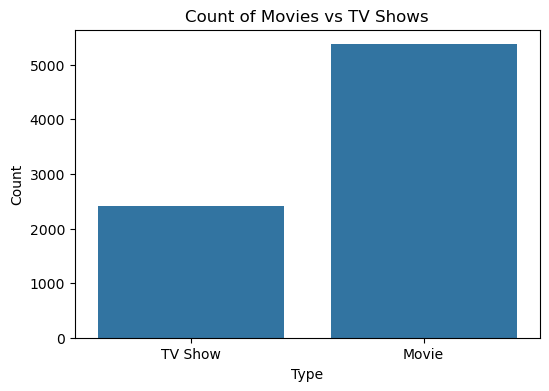

In [20]:
#Count of Movies vs TV Show
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type') 
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


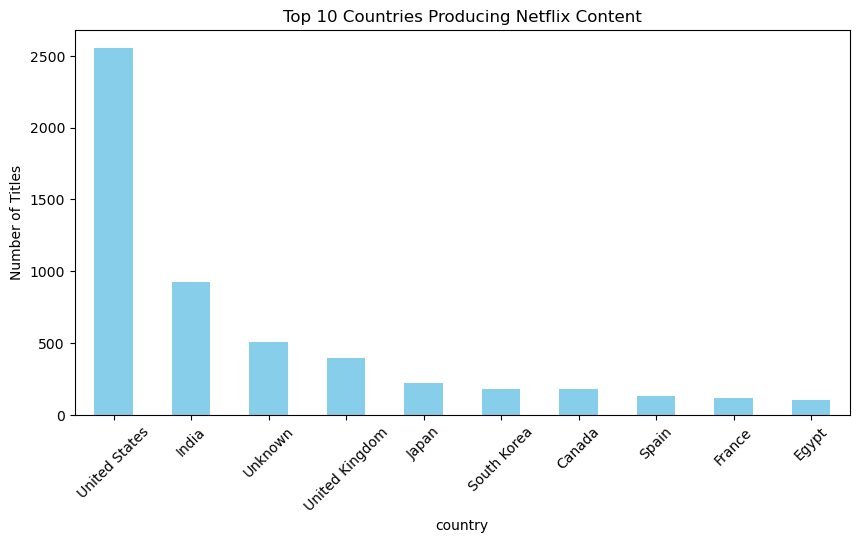

In [22]:
#Top Countries Producing Content

plt.figure(figsize=(10, 5))
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries Producing Netflix Content')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


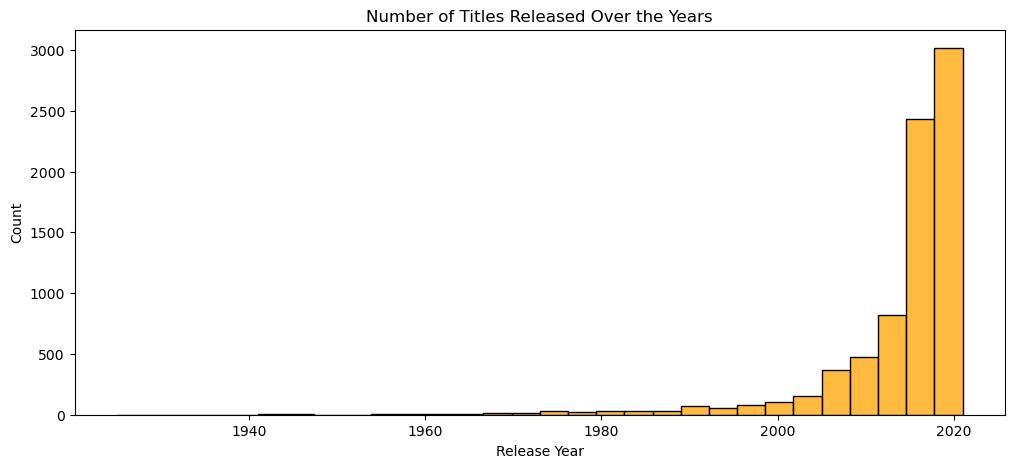

In [24]:
#Content Release Over Years

plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='release_year', bins=30, kde=False, color='orange')
plt.title('Number of Titles Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

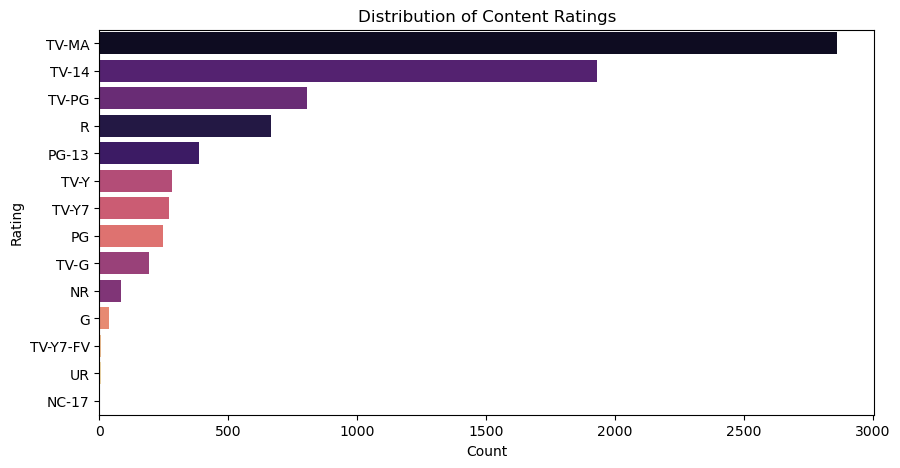

In [26]:
#Content Ratings Distribution

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, hue='rating', legend=False, palette='magma')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

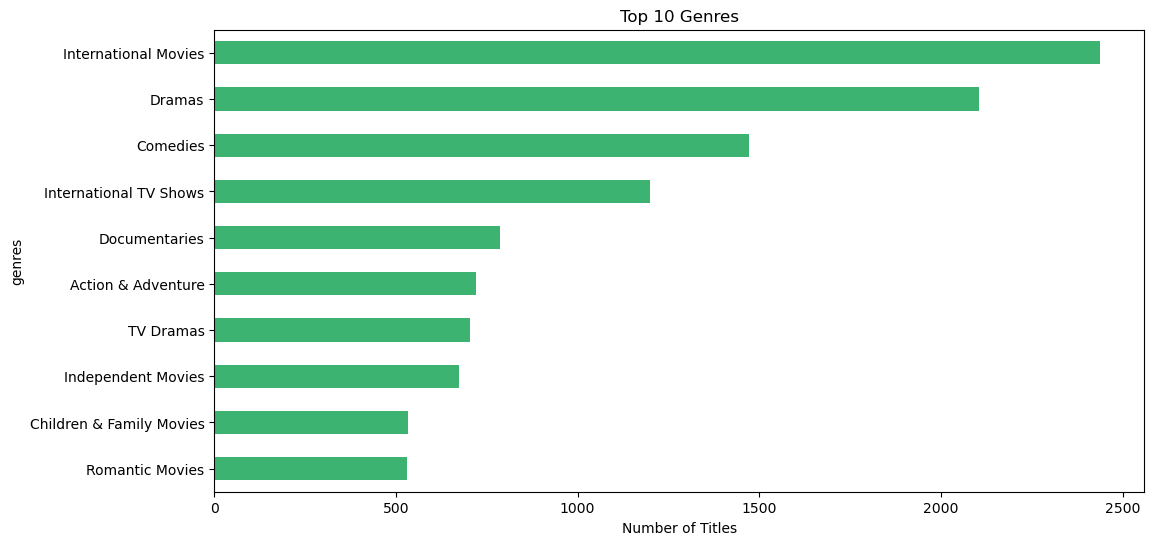

In [28]:
#Top Genres

# Split and explode genres
df['genres'] = df['listed_in'].str.split(', ')
genres = df.explode('genres')

plt.figure(figsize=(12, 6))
genres['genres'].value_counts().head(10).plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Genres')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

# Data Preprocessing

In [35]:
# Convert Duration to Numeric

def convert_duration(val):
    if 'min' in val:
        return int(val.replace(' min', ''))
    else:
        return None

df['duration_mins'] = df['duration'].apply(convert_duration)
df['duration_mins'] = df['duration_mins'].fillna(df['duration_mins'].median())


In [37]:
# One-hot encode 'type' and 'rating'
df_encoded = pd.get_dummies(df[['type', 'rating']], drop_first=True)

In [41]:
#Standardize Numerical Features
from sklearn.preprocessing import StandardScaler

df['content_age'] = 2025 - df['release_year']

numerical_features = df[['duration_mins', 'release_year', 'content_age']]
scaler = StandardScaler()
scaled_numerical = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns)


In [43]:
#NLP Feature Extraction with TF-IDF (Genres)
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF on genre/listed_in
tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_genres = tfidf.fit_transform(df['listed_in']).toarray()
tfidf_genres_df = pd.DataFrame(tfidf_genres, columns=tfidf.get_feature_names_out())


In [51]:
#Combine All Features into One Final Dataset

import pandas as pd

final_data = pd.concat([scaled_numerical, df_encoded,tfidf_genres_df], axis=1)

print("Final dataset shape:", final_data.shape)
final_data.head()


Final dataset shape: (7787, 37)


,duration_mins,release_year,content_age,type_TV Show,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,...,horror,independent,international,kids,movies,romantic,shows,stand,thrillers,tv
0,-0.038748,0.692655,-0.692655,True,False,False,False,False,False,False,...,0.000000,0.000000,0.231584,0.0,0.000000,0.0,0.338892,0.0,0.0,0.872378
1,-0.249646,0.236059,-0.236059,False,False,False,False,False,False,False,...,0.000000,0.000000,0.556703,0.0,0.531798,0.0,0.000000,0.0,0.0,0.000000
2,-0.882340,-0.334685,0.334685,False,False,False,False,False,True,False,...,0.726472,0.000000,0.318676,0.0,0.608839,0.0,0.000000,0.0,0.0,0.000000
3,-0.797981,-0.562983,0.562983,False,False,False,False,True,False,False,...,0.000000,0.582179,0.000000,0.0,0.284150,0.0,0.000000,0.0,0.0,0.000000
4,1.015742,-0.677132,0.677132,False,False,False,False,True,False,False,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000


# Feature Engineering

In [54]:
# Create content_age Feature
from datetime import datetime
current_year = datetime.now().year
df['content_age'] = current_year - df['release_year']


In [56]:
#genre_count
df['genre_count'] = df['listed_in'].apply(lambda x: len(str(x).split(',')))

In [60]:
#Encode Categorical Variables
df_encoded = pd.get_dummies(df[['type', 'rating', 'country']], drop_first=True)
print(df[['release_year', 'content_age', 'listed_in', 'genre_count']].head())
print(df_encoded.head())


   release_year  content_age  \
0          2020            5   
1          2016            9   
2          2011           14   
3          2009           16   
4          2008           17   

                                           listed_in  genre_count  
0  International TV Shows, TV Dramas, TV Sci-Fi &...            3  
1                       Dramas, International Movies            2  
2                Horror Movies, International Movies            2  
3  Action & Adventure, Independent Movies, Sci-Fi...            3  
4                                             Dramas            1  
   type_TV Show  rating_NC-17  rating_NR  rating_PG  rating_PG-13  rating_R  \
0          True         False      False      False         False     False   
1         False         False      False      False         False     False   
2         False         False      False      False         False      True   
3         False         False      False      False          True     False   
4   

# Clustering Model Selection

In [73]:
final_data.isnull().sum()

duration_mins    7
release_year     7
content_age      7
type_TV Show     7
rating_NC-17     7
                ..
romantic         7
shows            7
stand            7
thrillers        7
tv               7
Length: 718, dtype: int64

In [75]:
final_data.fillna(final_data.median(), inplace=True)
final_data.dropna(inplace=True)


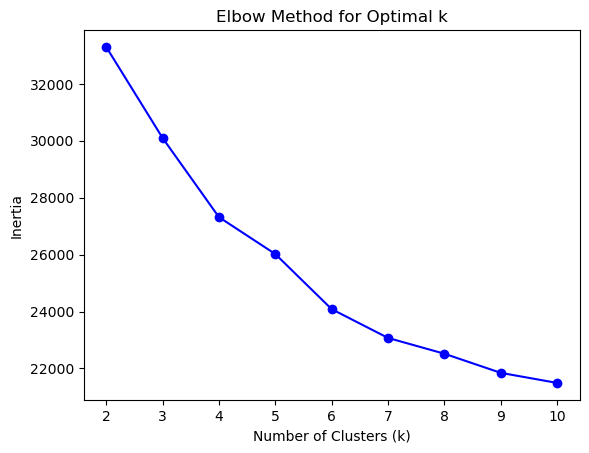

In [77]:
# K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_data)
    inertia_scores.append(kmeans.inertia_)

plt.plot(K, inertia_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


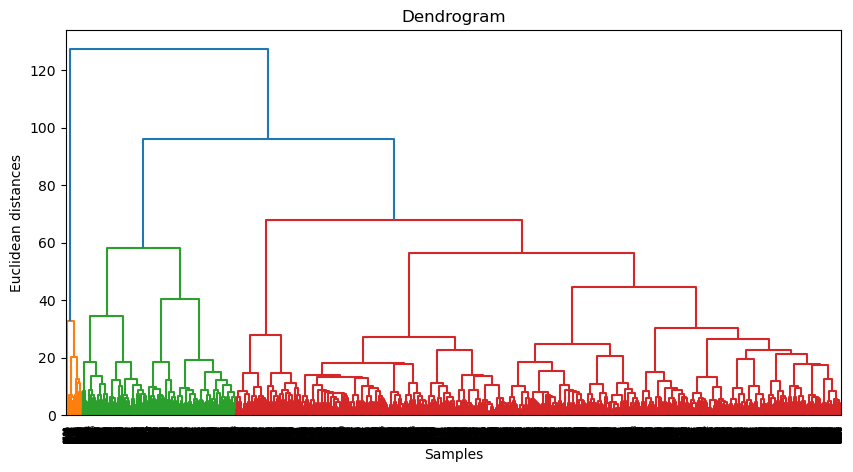

In [84]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(final_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


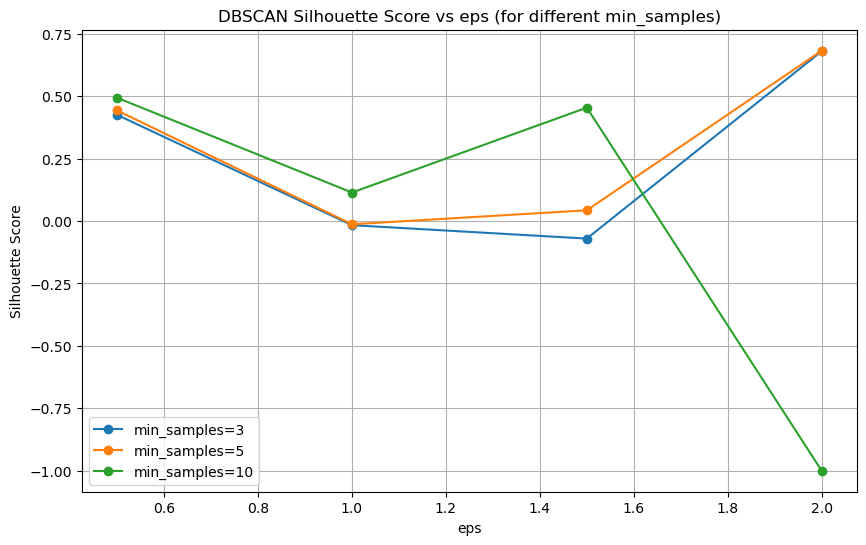

In [90]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 10]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(final_data)

        # Count unique labels (excluding -1 for noise)
        unique_labels = set(labels)
        unique_labels.discard(-1)

        if len(unique_labels) >= 2:
            mask = labels != -1
            score = silhouette_score(final_data[mask], labels[mask])
            results.append((eps, min_samples, score))
        else:
            results.append((eps, min_samples, -1))  # Not enough clusters

# Convert to DataFrame for plotting
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score'])

# Plot
plt.figure(figsize=(10, 6))
for min_samples in min_samples_values:
    subset = results_df[results_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['silhouette_score'], marker='o', label=f'min_samples={min_samples}')

plt.title("DBSCAN Silhouette Score vs eps (for different min_samples)")
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()


In [100]:
print("df:", df.shape)
print("final_data:", final_data.shape)
print("Indexes match?", df.index.equals(final_data.index))


df: (7780, 16)
final_data: (7787, 718)
Indexes match? False


In [106]:
print("df shape:", df.shape)
print("final_data shape:", final_data.shape)
print("NaNs in final_data:", final_data.isnull().sum().sum())


df shape: (7780, 16)
final_data shape: (7787, 718)
NaNs in final_data: 0


In [122]:

df_cleaned = df.dropna(subset=['description', 'listed_in']).copy()

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_cleaned['listed_in'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

from sklearn.preprocessing import StandardScaler

numerical_features = df_cleaned[['release_year', 'duration_mins']].copy()
numerical_features = numerical_features.fillna(0)

scaler = StandardScaler()
scaled_numerical = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns)

final_data = pd.concat([scaled_numerical.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
print("df_cleaned:", df_cleaned.shape)
print("final_data:", final_data.shape)


df_cleaned: (7780, 16)
final_data: (7780, 46)


# Model Training & Optimization

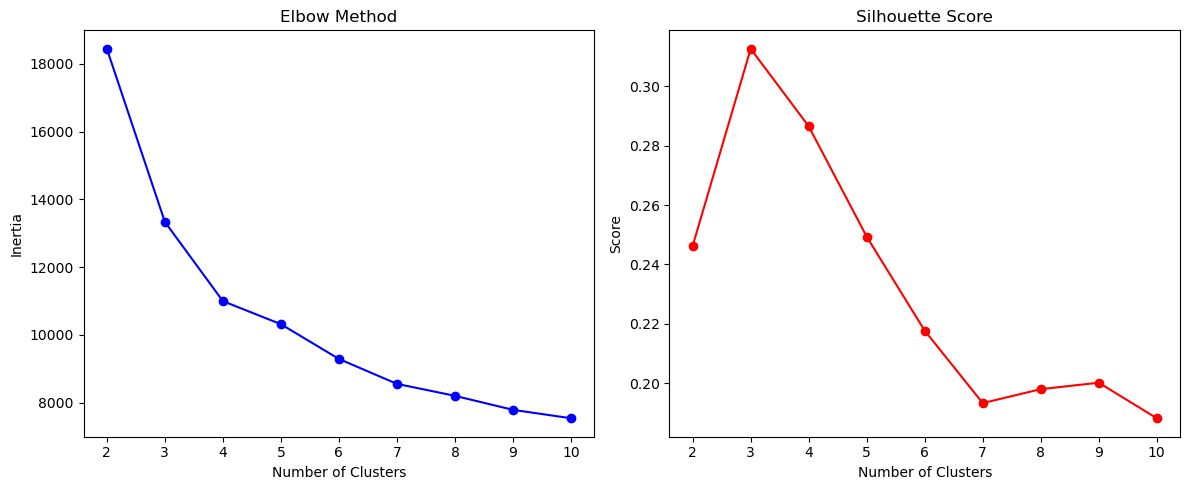

In [131]:
#Apply K-Means & Fine-Tune Hyperparameters (Elbow + Silhouette)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(final_data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(final_data, labels))

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'ro-')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [132]:
# Final KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['kmeans_cluster'] = kmeans.fit_predict(final_data)

# Evaluate
score = silhouette_score(final_data, df_cleaned['kmeans_cluster'])
print("Final K-Means Silhouette Score:", score)


Final K-Means Silhouette Score: 0.28657668753443993


In [135]:
#Evaluate Different Distance Metrics (Hierarchical Clustering)
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_data)

for method in ['ward', 'complete', 'average']:
    model = AgglomerativeClustering(n_clusters=4, linkage=method)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"{method.title()} Linkage Silhouette Score: {score}")


Ward Linkage Silhouette Score: 0.18732311550778957
Complete Linkage Silhouette Score: 0.4367210976728252
Average Linkage Silhouette Score: 0.4367210976728252


C:\Users\a\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


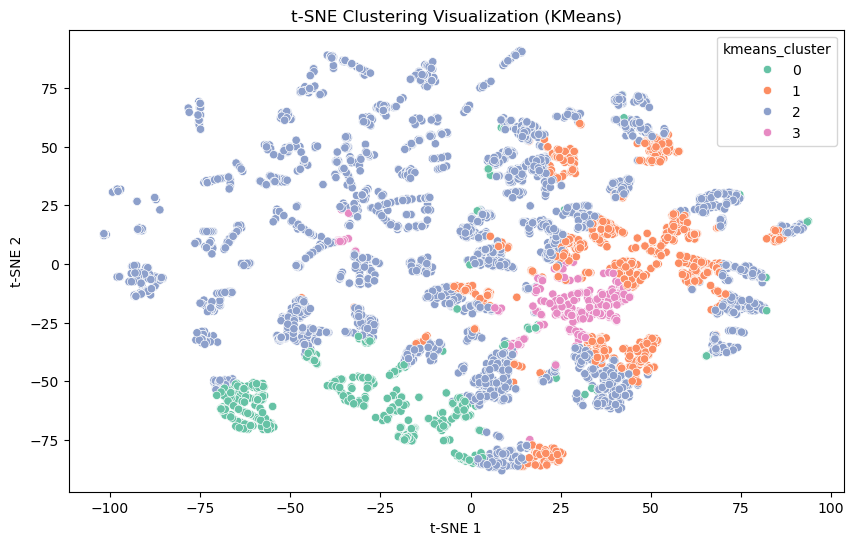

In [143]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(final_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df_cleaned['kmeans_cluster'], palette='Set2')
plt.title("t-SNE Clustering Visualization (KMeans)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

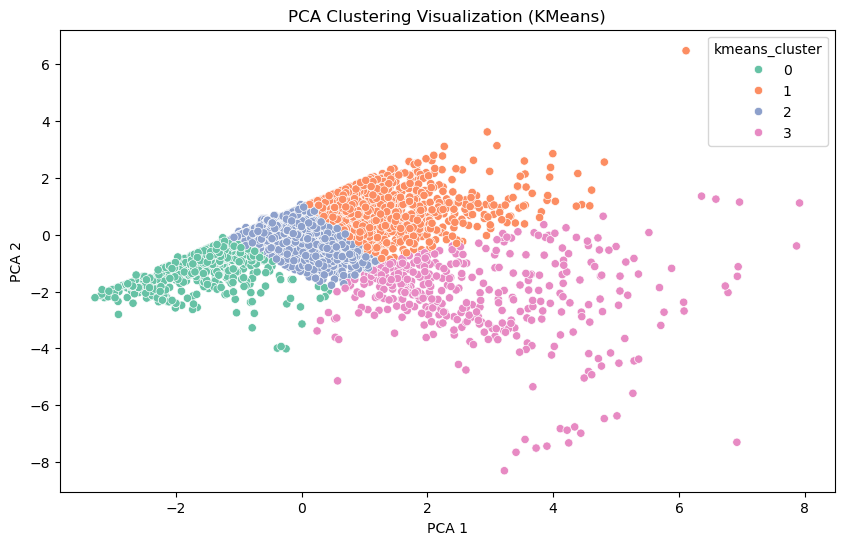

In [139]:
#PCA (linear projection)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(final_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_cleaned['kmeans_cluster'], palette='Set2')
plt.title("PCA Clustering Visualization (KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


# Visualization & Interpretation

C:\Users\a\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


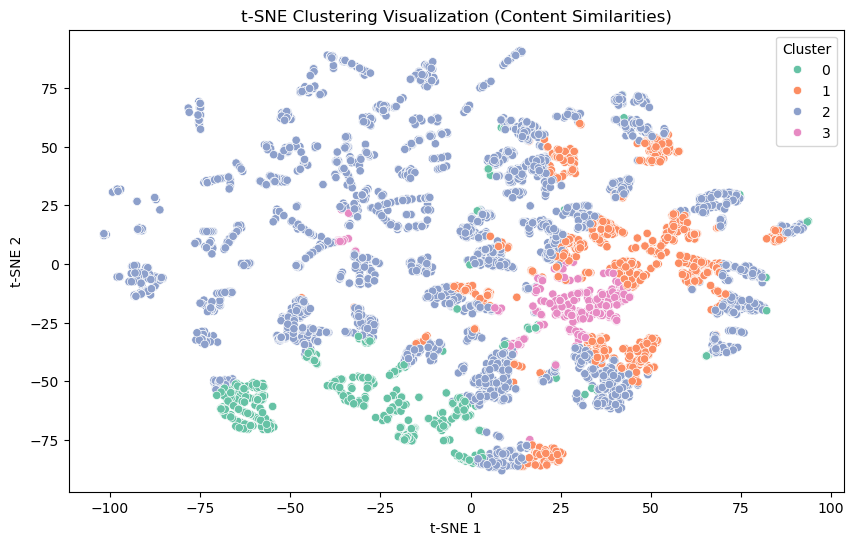

In [145]:
#Cluster Plot with t-SNE (Content Similarity)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(final_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df_cleaned['kmeans_cluster'], palette='Set2')
plt.title("t-SNE Clustering Visualization (Content Similarities)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Cluster')
plt.show()


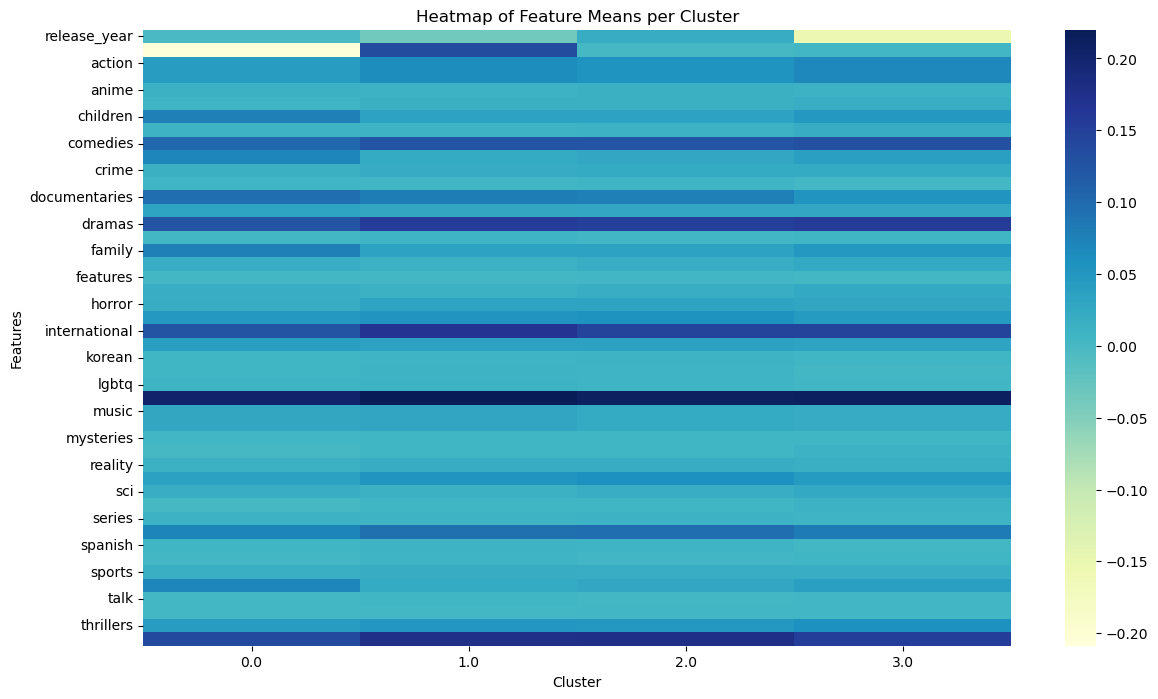

In [147]:
#Heatmap of Feature Correlation (Grouped by Cluster)
import pandas as pd

# Combine features and cluster labels
cluster_data = final_data.copy()
cluster_data['cluster'] = df_cleaned['kmeans_cluster']

# Group by cluster and compute mean feature values
cluster_means = cluster_data.groupby('cluster').mean()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_means.T, cmap="YlGnBu", annot=False)
plt.title("Heatmap of Feature Means per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.show()


C:\Users\a\AppData\Local\Temp\ipykernel_12824\1061112704.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_genres = top_genres.groupby('kmeans_cluster').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


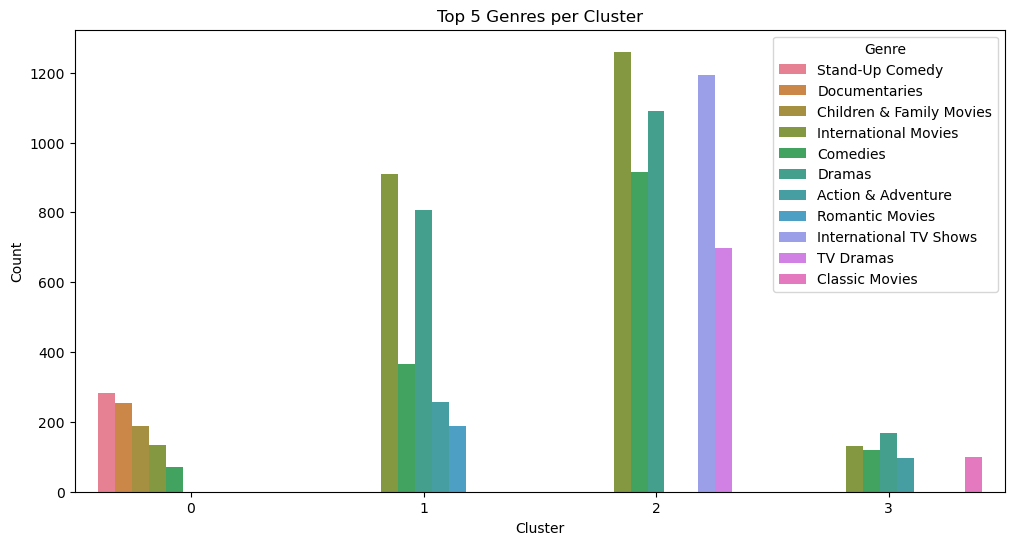

In [150]:
# Split 'listed_in' into list of genres
df_cleaned['genre_list'] = df_cleaned['listed_in'].str.split(', ')

# Explode to one genre per row
df_genres = df_cleaned[['kmeans_cluster', 'genre_list']].explode('genre_list')

# Most common genres per cluster
top_genres = df_genres.groupby(['kmeans_cluster', 'genre_list']).size().reset_index(name='count')

# Top 5 genres per cluster
top5_genres = top_genres.groupby('kmeans_cluster').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_genres, x='kmeans_cluster', y='count', hue='genre_list')
plt.title("Top 5 Genres per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Genre")
plt.show()


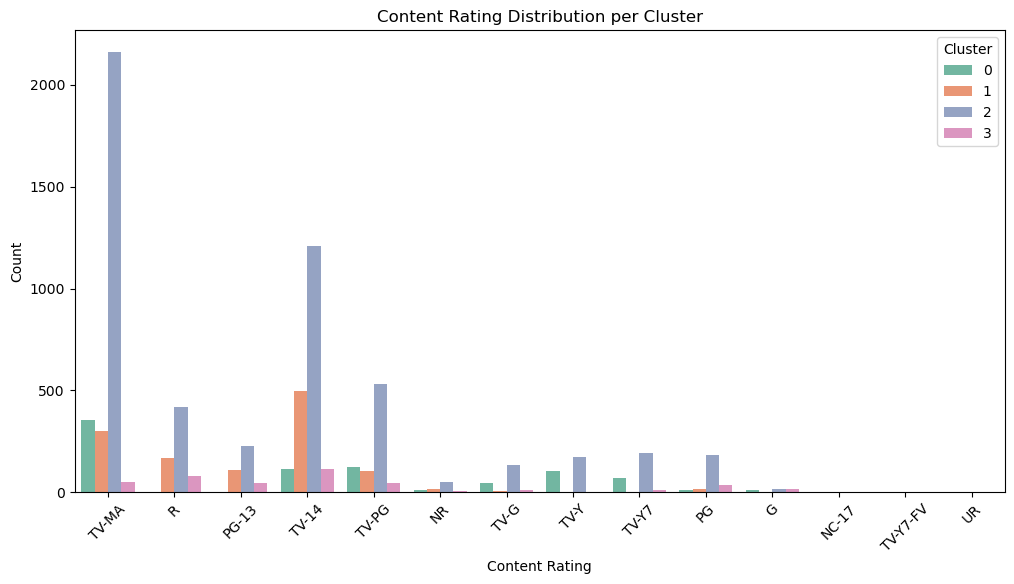

In [152]:
#Content Rating Distribution per Cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='rating', hue='kmeans_cluster', palette='Set2')
plt.title("Content Rating Distribution per Cluster")
plt.xlabel("Content Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()


# Evaluation & Refinement


In [155]:
#Evaluate KMeans Using Silhouette Score, Inertia & Davies-Bouldin Index
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(final_data)

# Evaluation Metrics
sil_score = silhouette_score(final_data, labels_kmeans)
db_index = davies_bouldin_score(final_data, labels_kmeans)
inertia = kmeans.inertia_

print(f"✅ Silhouette Score (KMeans): {sil_score:.4f}")
print(f"✅ Davies-Bouldin Index (KMeans): {db_index:.4f}")
print(f"✅ Inertia (KMeans): {inertia:.4f}")


✅ Silhouette Score (KMeans): 0.2866
✅ Davies-Bouldin Index (KMeans): 1.2148
✅ Inertia (KMeans): 10995.4077


In [159]:
#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Corrected AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels_hc = hc.fit_predict(final_data)

# Evaluation
print("✅ Hierarchical Silhouette Score:", silhouette_score(final_data, labels_hc))
print("✅ Hierarchical Davies-Bouldin Index:", davies_bouldin_score(final_data, labels_hc))


✅ Hierarchical Silhouette Score: 0.22563139538513158
✅ Hierarchical Davies-Bouldin Index: 1.5196017567008737


In [161]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(final_data)

# Filter noise points (-1)
valid_idx = labels_dbscan != -1
print("✅ DBSCAN Silhouette Score:", silhouette_score(final_data[valid_idx], labels_dbscan[valid_idx]))
print("✅ DBSCAN Davies-Bouldin Index:", davies_bouldin_score(final_data[valid_idx], labels_dbscan[valid_idx]))


✅ DBSCAN Silhouette Score: 0.7466047747959587
✅ DBSCAN Davies-Bouldin Index: 0.2582543393732465


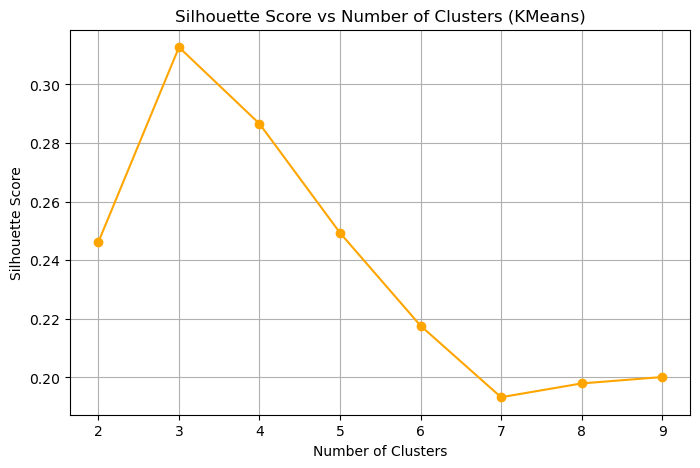

In [163]:
#DBSCAN
#Silhouette Score vs Number of Clusters (KMeans Elbow Style)
sil_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(final_data)
    sil_scores.append(silhouette_score(final_data, labels))

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sil_scores, marker='o', color='orange')
plt.title("Silhouette Score vs Number of Clusters (KMeans)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()
